In [126]:
import pandas as pd
data = pd.read_csv(r'C:\Users\venug\Downloads\startup_funding.csv',skipinitialspace = True,index_col = 'SNo',parse_dates = True)
type(data.Date)

pandas.core.series.Series

In [127]:
data.Date = data.Date.str.replace('.','/')
data.Date = data.Date.str.replace('//','/')
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format = True)



In [128]:
data['Year'] = data['Date'].dt.year
data.Year = data.Year.astype(int)
data.AmountInUSD = data.AmountInUSD.str.replace(',','').astype(float)
TotalFunding = data.groupby(data.Year).AmountInUSD.sum()
TotalFunding.head()


Year
2015    8.673022e+09
2016    3.828089e+09
2017    5.846276e+09
Name: AmountInUSD, dtype: float64

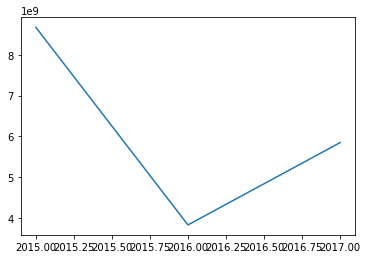

Year
2015    8.673022e+09
2016    3.828089e+09
2017    5.846276e+09
Name: AmountInUSD, dtype: float64


In [129]:
TotalFunding = data.groupby(data.Year).AmountInUSD.sum()

from matplotlib import pyplot as plt
plt.plot(TotalFunding.index,TotalFunding.values)
plt.show()
print(TotalFunding)

In [131]:
data.CityLocation = data.CityLocation.astype(str)
data.CityLocation = data.CityLocation.str.title()
data.CityLocation = data.CityLocation.replace('Delhi','New Delhi')
data.CityLocation = data.CityLocation.replace('Dallas / Hyderabad','Hyderabad / Dallas')
data.IndCity = data.CityLocation.str.split('/',expand = True)[0]
data.IndCity = data.IndCity.str.rstrip()
City = data.groupby(data.IndCity).StartupName.count()
City


0
Agra            2
Ahmedabad      35
Bangalore     635
Belgaum         1
Bhopal          2
Boston          1
Chandigarh     10
Chennai        67
Coimbatore      3
Goa             8
Gurgaon       241
Gwalior         2
Hubli           1
Hyderabad      78
India           1
Indore          9
Jaipur         25
Jodhpur         1
Kanpur          4
Karur           1
Kerala          1
Kochi           2
Kolkata        19
Kozhikode       1
London          1
Lucknow         1
Missourie       1
Mumbai        449
Nagpur          1
Nan           179
New Delhi     389
New York        1
Noida          79
Panaji          1
Pune           91
Seattle         1
Sfo             1
Siliguri        2
Singapore       5
Surat           1
Trivandrum      2
Udaipur         1
Udupi           2
Us              2
Usa             2
Vadodara        9
Varanasi        1
Name: StartupName, dtype: int64

In [142]:
Funding = data.groupby(data.IndCity).AmountInUSD.sum()
Funding = Funding.drop('Nan')
PercentFunding = Funding.nlargest(10)
Sum = Funding.sum()
PercentFunding = (PercentFunding/Sum)*100
PercentFunding 
for i in PercentFunding.index:
    print(i,'%.2f'%PercentFunding[i])


Bangalore 49.33
New Delhi 16.50
Mumbai 13.79
Gurgaon 12.12
Chennai 2.41
Pune 2.15
Hyderabad 1.15
Noida 1.00
Ahmedabad 0.58
Jaipur 0.21


In [146]:
data
data.InvestmentType.unique()
data.InvestmentType.replace('PrivateEquity','Private Equity',inplace = True)
data.InvestmentType.replace('SeedFunding','Seed Funding',inplace = True)
data.InvestmentType.replace('Crowd funding','Crowd Funding',inplace = True)
data.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'Crowd Funding'], dtype=object)

In [151]:
InvestmentType = data.groupby(data.InvestmentType).AmountInUSD.sum()
Total = InvestmentType.sum()
InvestmentType = (InvestmentType/Total)*100
for i in InvestmentType.index:
    print(i,'%.2f'%InvestmentType[i])

Crowd Funding 0.00
Debt Funding 0.04
Private Equity 98.15
Seed Funding 1.81


In [158]:
data.StartupName.replace('Ola Cabs','Ola',inplace = True)
data.StartupName.replace('Olacabs','Ola',inplace = True)
data.StartupName.replace('Flipkart.com','Flipkart',inplace = True)
data.StartupName.replace('Paytm Marketplace','Paytm',inplace = True)
Companies = data.groupby(data.StartupName).AmountInUSD.sum()

Companies.nlargest(10)

StartupName
Paytm         2.340000e+09
Flipkart      2.259700e+09
Ola           1.899500e+09
Snapdeal      7.000000e+08
Oyo Rooms     3.500000e+08
Quikr         2.300000e+08
Delhivery     2.150000e+08
Foodpanda     2.100000e+08
BigBasket     2.070000e+08
MakeMyTrip    1.800000e+08
Name: AmountInUSD, dtype: float64

In [283]:
data.IndustryVertical.unique()
data.IndustryVertical.replace('eCommerce','ECommerce',inplace = True)
data.IndustryVertical.replace('eCommerce platform','ECommerce',inplace = True)
data.IndustryVertical.replace('ECommerce Marketplace','ECommerce',inplace = True)
Industry = data.groupby(data.IndustryVertical).AmountInUSD.sum()
Total = data.AmountInUSD.sum()
Industry = (Industry/Total)*100
LargestIndustries = Industry.nlargest(5)
for i in LargestIndustries.index:
    print(i,'%.2f'%LargestIndustries[i])

ECommerce 23.58
Consumer Internet 20.70
Technology 6.01
Online Marketplace 3.82
E-Commerce & M-Commerce platform 3.71


In [280]:
data.StartupName.replace('Ola Cabs','Ola',inplace = True)
data.StartupName.replace('Olacabs','Ola',inplace = True)
data.StartupName.replace('Flipkart.com','Flipkart',inplace = True)
data.StartupName.replace('Paytm Marketplace','Paytm',inplace = True)
data.StartupName.replace('Oyo Rooms','Oyo',inplace = True)
data.StartupName.replace('OyoRooms','Oyo',inplace = True)
data.StartupName.replace('Oyorooms','Oyo',inplace = True)
data.StartupName.replace('OYO Rooms','Oyo',inplace = True)




In [281]:
FundingRounds = data.groupby(data.StartupName).StartupName.count()
FundingRounds.sort_values(ascending = False,inplace = True)
FundingRounds.head(5)

StartupName
Ola          9
Swiggy       7
Paytm        6
Oyo          6
UrbanClap    6
Name: StartupName, dtype: int64

In [168]:
data

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
SNo,,,,,,,,,,
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,2017
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017
5,2017-01-07,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000000.0,NaN,2017
6,2017-03-07,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2600000.0,NaN,2017
7,2017-04-07,Droom,ECommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,20000000.0,NaN,2017
8,2017-05-07,Jumbotail,ECommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,8500000.0,NaN,2017


In [1]:
data.InvestorsName.fillna('U',inplace = True)
Investors = data.InvestorsName.str.strip()
Investors = data.InvestorsName.str.split(',')
InvDict = {}
#Investors = Investors.fillna('U')
#Investors = Investors.astype(str)
for i in Investors:
    for j in i:
        j = j.strip()
        InvDict[j] = InvDict.get(j,0) + 1
print(InvDict)
maximum = max(InvDict,key = InvDict.get)
print(maximum,InvDict[maximum])

NameError: name 'data' is not defined